In [98]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
path = r"C:\Users\Lenovo\Documents\GitHub\CreditCard_Analysis\data\featured_credit_card_transaction.csv"
df = pd.read_csv(path)

In [78]:
df

,trans_date_time,cc_num_key,merchant,category,amt,gender,city,state,trunc_zip,lat,...,merch_long,is_fraud,merch_zipcode,hour,dayofweek,month,weekend,distance,age_bucket,city buckets
0,2019-01-01 00:00:18,445,"fraud_Rippin, Kub and Mann",misc,4.97,F,Moravian Falls,NC,286,36.0788,...,-82.048315,0,28705,0,1,1,0.0,0.872830,31-50,high population
1,2019-01-01 00:00:44,43,"fraud_Heller, Gutmann and Zieme",grocery,107.23,F,Orient,WA,991,48.8878,...,-118.186462,0,0,0,1,1,0.0,0.272310,31-50,Low population
2,2019-01-01 00:00:51,238,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,832,42.1808,...,-112.154481,0,83236,0,1,1,0.0,0.975845,50+,high population
3,2019-01-01 00:01:16,510,"fraud_Kutch, Hermiston and Farrell",gas,45.00,M,Boulder,MT,596,46.2306,...,-112.561071,0,0,0,1,1,0.0,0.919802,50+,Low population
4,2019-01-01 00:03:06,369,fraud_Keeling-Crist,misc,41.96,M,Doe Hill,VA,244,38.4207,...,-78.632459,0,22844,0,1,1,0.0,0.868505,31-50,Low population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,180,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,847,37.7175,...,-111.690765,0,0,12,6,6,1.0,1.177732,50+,Low population
1296671,2020-06-21 12:12:19,814,fraud_Abernathy and Sons,food,51.70,M,Tuscarora,MD,217,39.2667,...,-78.246528,0,22630,12,6,6,1.0,0.819632,31-50,Low population
1296672,2020-06-21 12:12:32,475,fraud_Stiedemann Ltd,food,105.93,M,High Rolls Mountain Park,NM,883,32.9396,...,-105.130529,0,88351,12,6,6,1.0,0.967541,50+,Low population
1296673,2020-06-21 12:13:36,452,"fraud_Reinger, Weissnat and Strosin",food,74.90,M,Manderson,SD,577,43.3526,...,-103.241160,0,69367,12,6,6,1.0,0.898775,31-50,Low population


In [79]:
df['trans_date_time'] = pd.to_datetime(df['trans_date_time'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   trans_date_time  1296675 non-null  datetime64[ns]
 1   cc_num_key       1296675 non-null  int64         
 2   merchant         1296675 non-null  object        
 3   category         1296675 non-null  object        
 4   amt              1296675 non-null  float64       
 5   gender           1296675 non-null  object        
 6   city             1296675 non-null  object        
 7   state            1296675 non-null  object        
 8   trunc_zip        1296675 non-null  int64         
 9   lat              1296675 non-null  float64       
 10  lon              1296675 non-null  float64       
 11  city_pop         1296675 non-null  int64         
 12  job              1296675 non-null  object        
 13  age              1296675 non-null  int64         
 14  tr

In [82]:
col = ['merchant','job','city','state','lat','lon','trans_num','merch_lat','merch_long','age_bucket','trans_date_time','trunc_zip','merch_zipcode','city buckets']
df.drop(columns=col,inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num_key  1296675 non-null  int64  
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city_pop    1296675 non-null  int64  
 5   age         1296675 non-null  int64  
 6   is_fraud    1296675 non-null  int64  
 7   hour        1296675 non-null  int64  
 8   dayofweek   1296675 non-null  int64  
 9   month       1296675 non-null  int64  
 10  weekend     1296675 non-null  float64
 11  distance    1296675 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 118.7+ MB


In [85]:
gender = pd.get_dummies(df['gender'],drop_first=True)
category = pd.get_dummies(df['category'],drop_first=True)

In [86]:
df.drop(['category','gender'],axis=1,inplace=True)

In [87]:
df = pd.concat([df,category,gender],axis=1)

In [88]:
print(df.columns)
print(df.shape)

Index(['cc_num_key', 'amt', 'city_pop', 'age', 'is_fraud', 'hour', 'dayofweek',
       'month', 'weekend', 'distance', 'food', 'gas', 'grocery', 'health',
       'home', 'kids', 'misc', 'personal', 'shopping', 'travel', 'M'],
      dtype='object')
(1296675, 21)


In [89]:
y = df['is_fraud']
df.drop('is_fraud',axis=1,inplace=True)
X = df

In [90]:
print(y.shape)
print(X.shape)

(1296675,)
(1296675, 20)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
fraudmodel = LogisticRegression(class_weight='balanced')
fraudmodel.fit(X_train,y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred = fraudmodel.predict(X_test)

[0 0 0 ... 1 0 0]     364558     0
834017     0
489882     0
506493     0
668183     0
          ..
757189     1
1037465    0
2840       0
1163972    0
1206000    0
Name: is_fraud, Length: 389003, dtype: int64


In [96]:
confusion_matrix = metrics.confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[361691    555]
 [ 25036   1721]]


In [97]:
report = metrics.classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    362246
           1       0.76      0.06      0.12     26757

    accuracy                           0.93    389003
   macro avg       0.85      0.53      0.54    389003
weighted avg       0.92      0.93      0.91    389003



In [103]:
y_proba = fraudmodel.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,y_proba[:,1])
print(auc)

0.8616882356982815


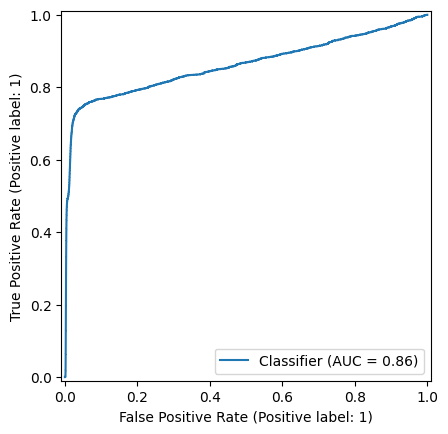

In [106]:
metrics.RocCurveDisplay.from_predictions(y_test,y_proba[:,1])
plt.show()